# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [3]:
import pandas as pd
## Load the data into a DataFrame
df = pd.read_csv('/Users/PatrickChen/Desktop/CSV FILES/Iowa_Liquor_Sales.csv')

# Delete unnecessary columns
del df["Category Name"]
del df["Item Description"]
del df["County"]

# chante dates format
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# drop na
df = df.dropna()

# Change dollar to float
df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x:float(x.strip('$')))
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x:float(x.strip('$')))
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x:float(x.strip('$')))

# change to interger 
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

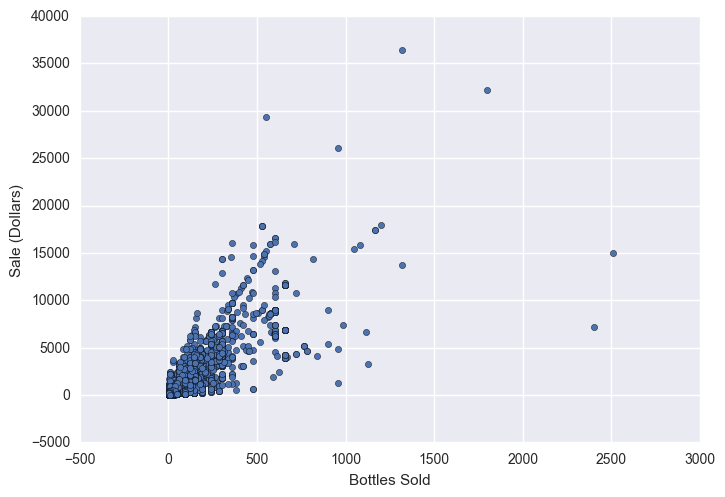

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Perform some exploratory analysis, e.g.
df.plot.scatter(x="Bottles Sold", y="Sale (Dollars)")
plt.show()

In [14]:
df.corr()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Number,1.000000,0.007572,-0.012266,-0.004653,-0.026552,-0.062789,-0.071392,-0.071528,0.014817,-0.017620,-0.017297,-0.017286
County Number,0.007572,1.000000,-0.006336,0.001681,0.006824,-0.027823,0.012149,0.012075,0.018952,0.019854,0.010194,0.010203
Category,-0.012266,-0.006336,1.000000,0.091787,0.116240,-0.009339,-0.013471,-0.013658,-0.000155,0.006447,-0.004296,-0.004287
Vendor Number,-0.004653,0.001681,0.091787,1.000000,0.136058,0.024799,0.003689,0.003297,-0.002258,-0.012324,-0.007457,-0.007453
Item Number,-0.026552,0.006824,0.116240,0.136058,1.000000,-0.057292,0.097714,0.097446,-0.004690,0.003097,-0.009467,-0.009457
Bottle Volume (ml),-0.062789,-0.027823,-0.009339,0.024799,-0.057292,1.000000,0.312128,0.313108,-0.012078,0.082576,0.156317,0.156149
State Bottle Cost,-0.071392,0.012149,-0.013471,0.003689,0.097714,0.312128,1.000000,0.999960,-0.062789,0.135784,0.009275,0.009244
State Bottle Retail,-0.071528,0.012075,-0.013658,0.003297,0.097446,0.313108,0.999960,1.000000,-0.062641,0.135967,0.009714,0.009683
Bottles Sold,0.014817,0.018952,-0.000155,-0.002258,-0.004690,-0.012078,-0.062789,-0.062641,1.000000,0.826022,0.883978,0.884008
Sale (Dollars),-0.017620,0.019854,0.006447,-0.012324,0.003097,0.082576,0.135784,0.135967,0.826022,1.000000,0.846509,0.846520


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [17]:
import numpy as np
# Determine which zipcodes were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Zip Code"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out zipcodes that opened or closed throughout the year ( only 2015)
lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")
mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)
good_stores = dates[mask]["Zip Code"]
df = df[df["Zip Code"].isin(good_stores)]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [18]:
# Profit margin on sale
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
df["Price per Liter"] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38,27.00,9.000000
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40,13.76,27.506667
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34,151.20,18.890000
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77,28.50,8.142857
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55,43.20,6.171429


In [19]:
# Sales per zipcode, 2015

# Filter by our start and end dates
df.sort_values(by=["Zip Code", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Zip Code"], as_index=False)

# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]

# Rename columns
sales.columns = [u'Zip Code', u'City', u'2015 Sales',
       u'2015 Sales mean', u'Price per Liter mean', u'County Number',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# group by store
sales.corr()

,2015 Sales,2015 Sales mean,Price per Liter mean,County Number,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
2015 Sales,1.000000,0.524151,0.447862,0.123318,0.994753,0.356399,0.521604
2015 Sales mean,0.524151,1.000000,0.270455,0.097443,0.508252,0.911050,0.999923
Price per Liter mean,0.447862,0.270455,1.000000,0.200549,0.432328,-0.043422,0.267546
County Number,0.123318,0.097443,0.200549,1.000000,0.115838,0.037247,0.097285
2015 Volume Sold (Liters),0.994753,0.508252,0.432328,0.115838,1.000000,0.355703,0.505983
2015 Volume Sold (Liters) mean,0.356399,0.911050,-0.043422,0.037247,0.355703,1.000000,0.913419
2015 Margin mean,0.521604,0.999923,0.267546,0.097285,0.505983,0.913419,1.000000


In [20]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
df.sort_values(by=["Zip Code", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Zip Code"], as_index=False)["Sale (Dollars)","Volume Sold (Liters)"].sum()
sales["2015 Sales Q1"] = df2["Sale (Dollars)"]
sales["2015 Volume Sold (Liters)Q1"] = df2["Volume Sold (Liters)"]

# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
df.sort_values(by=["Zip Code", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Zip Code"], as_index=False)["Sale (Dollars)","Volume Sold (Liters)"].sum()
sales["2016 Sales Q1"] = df2["Sale (Dollars)"]
sales["2016 Volume Sold (Liters)Q1"] = df2["Volume Sold (Liters)"]

In [21]:
sales.dropna(inplace=True)
sales.head()

,Zip Code,City,2015 Sales,2015 Sales mean,Price per Liter mean,County Number,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2015 Volume Sold (Liters)Q1,2016 Sales Q1,2016 Volume Sold (Liters)Q1
0,50002,ADAIR,4958.04,134.001081,16.286538,1,335.85,9.077027,44.958919,1379.04,93.60,893.16,55.50
1,50003,ADEL,38095.16,151.171270,15.768157,25,2737.52,10.863175,50.533452,11657.81,830.07,9620.94,784.48
2,50006,ALDEN,10086.97,103.989381,16.420468,42,719.24,7.414845,34.741959,2448.60,176.12,2193.27,141.00
3,50009,ALTOONA,241028.59,139.726719,18.654908,77,16284.00,9.440000,46.705067,42674.32,2986.26,53589.76,4000.04
4,50010,AMES,772044.25,136.091001,19.208233,85,52520.63,9.257999,45.510004,176338.60,12381.30,160651.46,10885.93


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [22]:
from sklearn import datasets, linear_model

# Set variable for model creation
lm = linear_model.LinearRegression()
X = sales[["2015 Sales Q1","2015 Volume Sold (Liters)Q1"]]
y = sales["2015 Sales"]

# Made model
lm.fit(X, y)
predictions = lm.predict(X)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

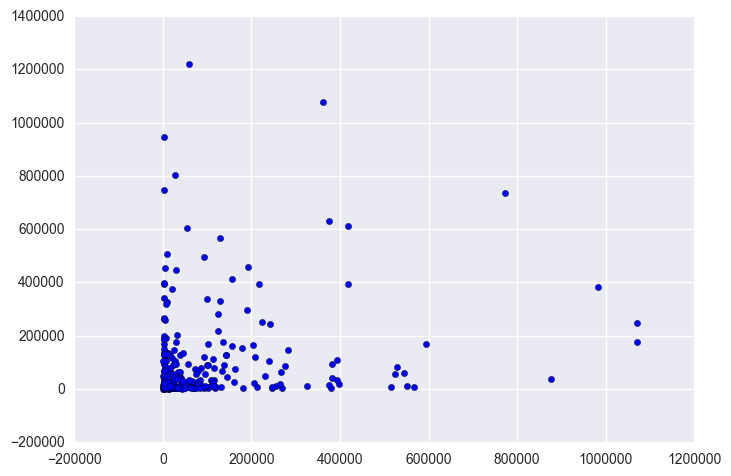

In [34]:
plt.scatter(y,predictions)
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [23]:
# Set variable
X = sales[["2016 Sales Q1","2016 Volume Sold (Liters)Q1"]]

# predict for 2016
predictions = lm.predict(X)


total_2016 = sum(predictions)
total_2015 = sum(sales["2015 Sales"])
X2 = sales[["2015 Sales Q1","2015 Volume Sold (Liters)Q1"]]
pred_2015 = sum(lm.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016

2015 predicted 27825857.42
2015 actual 27825857.42
2016 predicted 29001577.3748


In [24]:
# new col for 2016 prediced sales
sales["2016 Predicted Sales"] = predictions

# create projected percent growth
percent_growth = (sales['2016 Predicted Sales']-sales['2015 Sales'])/sales['2015 Sales']
sales["percent_growth"] = percent_growth


In [25]:
# create sales table
sales = sales[["Zip Code","2015 Sales","2016 Predicted Sales","percent_growth"]]
sales.head()

,Zip Code,2015 Sales,2016 Predicted Sales,percent_growth
0,50002,4958.04,4975.704566,0.003563
1,50003,38095.16,44707.207636,0.173567
2,50006,10086.97,10919.411307,0.082526
3,50009,241028.59,245365.483242,0.017993
4,50010,772044.25,734988.057347,-0.047997


In [26]:
# create rankes for sales & growth
rank =[]
for i in range(379):
    i = i +1
    rank.append(i)
sales = sales.sort('2016 Predicted Sales')
sales["Sales Rank"] = rank

sales = sales.sort('percent_growth')
sales["Growth Rank"] = rank

sales.head()
sales["Total Rank"] = sales["Sales Rank"]+ sales["Growth Rank"]
sales = sales.sort("Total Rank",ascending=False)
sales.head(10)

/Users/PatrickChen/anaconda/envs/dsienv/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/PatrickChen/anaconda/envs/dsienv/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/PatrickChen/anaconda/envs/dsienv/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Zip Code,2015 Sales,2016 Predicted Sales,percent_growth,Sales Rank,Growth Rank,Total Rank
300,52228,3293.81,9.473746e+05,286.622732,377,378,755
240,51462,1370.60,7.479232e+05,544.690389,375,379,754
241,51466,1712.64,3.973086e+05,230.986058,363,377,740
111,50475,2808.42,3.958016e+05,139.933914,362,375,737
171,50682,4986.59,4.556256e+05,90.370182,366,370,736
140,50602,8581.23,5.064675e+05,58.020380,369,365,734
348,52626,2063.89,3.400753e+05,163.773931,357,376,733
329,52361,27184.02,8.030830e+05,28.542467,376,355,731
83,50313,58762.73,1.221463e+06,19.786350,379,350,729
367,52751,2814.35,2.682576e+05,94.317789,350,371,721
